## Sequential Graph
### Objectives
1. Create multiple `Nodes` that sequentially process and update different parts of the state.
2. Connect `Nodes` together in a graph
3. Invoke the `Graph` and see how the **state is transformed** step-by-step

**Main Goal**: Create and handle multiple `Nodes`

In [18]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [19]:
class AgentState(TypedDict):
  name: str
  age: str
  final: str

In [20]:
def first_node(state: AgentState) -> AgentState: 
  """This is the first node of our sequence"""

  state['final'] = f"Hi {state['name']}."
  return state

def second_node(state: AgentState) -> AgentState:
  """This is the second node of the sequence"""

  state['final'] = state['final'] + f" You are {state['age']} years old"
  return state

# def final_node(state: AgentState) -> AgentState:

#   return state

In [21]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.set_finish_point("second_node")

app = graph.compile()

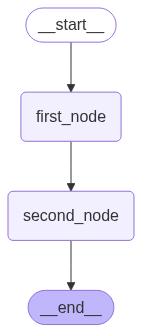

In [22]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
result = app.invoke({"name": "Ashik", "age": "23", "final": ""})

In [24]:
print(result)

{'name': 'Ashik', 'age': '23', 'final': 'Hi Ashik. You are 23 years old'}


#### Task
1. Accept a user's `name`, `age`, and a list of their `skills`.
2. Pass the state through **three nodes** that:
   - **First node**: Personalizes the `name` field with a greeting
   - **Second node**: Describes the user's `age`
   - **Third node**: Lists the user's skills in a formatted string
3. The final output in the `result` filed should be **combined message** in this format:

**Output**: "Ashik, welcome to the system! You are 31 years old! You have skills in: Python, Machine Learning, and LangGraph"

In [25]:
class CombineState(TypedDict):
  name: str
  age: str
  skills: List[str]
  result: str

In [26]:
def firstNode(state: CombineState) -> CombineState:
  """This is the first node about name"""

  state['result'] = f"{state['name']}, welcome to the system!"
  return state

In [27]:
def secondNode(state: CombineState) -> CombineState:
  """This node describe about age"""
  state['result'] = state['result'] + f" You are {state['age']} years old."
  return state

In [28]:
def finalNode(state: CombineState) -> CombineState:
  """This combined about skills"""
  skills = state['skills']
  skills_text = ', '.join(skills[:-1]) + f", and {skills[-1]}"
  state['result'] = state['result'] + f" You have skill in {skills_text}"

  return state

In [29]:
graph2 = StateGraph(CombineState)

(graph2.add_node("name_node", firstNode)
.add_node("age_node", secondNode)
.add_node("skills_node", finalNode))

graph2.set_entry_point("name_node")
graph2.add_edge("name_node", "age_node")
graph2.add_edge("age_node", "skills_node")
graph2.set_finish_point("skills_node")

app2 = graph2.compile()

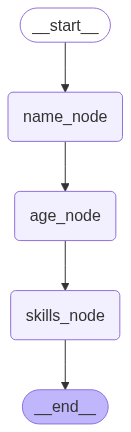

In [30]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [31]:
app2.invoke({"name": "Ashik", "age": "23", "skills": ["Python", "Machine Learning", "LangGraph"], "result": ""})

{'name': 'Ashik',
 'age': '23',
 'skills': ['Python', 'Machine Learning', 'LangGraph'],
 'result': 'Ashik, welcome to the system! You are 23 years old. You have skill in Python, Machine Learning, and LangGraph'}